In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 영화 리뷰 분류 -이진 분류

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [3]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print (train_labels[0])


1


In [6]:
print (max([max(sequence) for sequence in train_data]))


9999


In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print (decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [20]:
import numpy as np

def vectorize_sequences(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i,seq] =1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [31]:
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])


In [33]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss =losses.binary_crossentropy,metrics =[metrics.binary_accuracy])

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 1s 37ms/step - loss: 0.5145 - acc: 0.7853 - val_loss: 0.3865 - val_acc: 0.8745
Epoch 2/50
30/30 [==============================] - 0s 14ms/step - loss: 0.3067 - acc: 0.9035 - val_loss: 0.3228 - val_acc: 0.8745
Epoch 3/50
30/30 [==============================] - 0s 14ms/step - loss: 0.2246 - acc: 0.9276 - val_loss: 0.2883 - val_acc: 0.8850
Epoch 4/50
30/30 [==============================] - 0s 14ms/step - loss: 0.1783 - acc: 0.9434 - val_loss: 0.2859 - val_acc: 0.8836
Epoch 5/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1464 - acc: 0.9534 - val_loss: 0.2956 - val_acc: 0.8816
Epoch 6/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1204 - acc: 0.9645 - val_loss: 0.3133 - val_acc: 0.8786
Epoch 7/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1010 - acc: 0.9693 - val_loss: 0.3124 - val_acc: 0.8835
Epoch 8/50
30/30 [==============================] - 0s 13ms/step - loss: 0.0818 - a

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

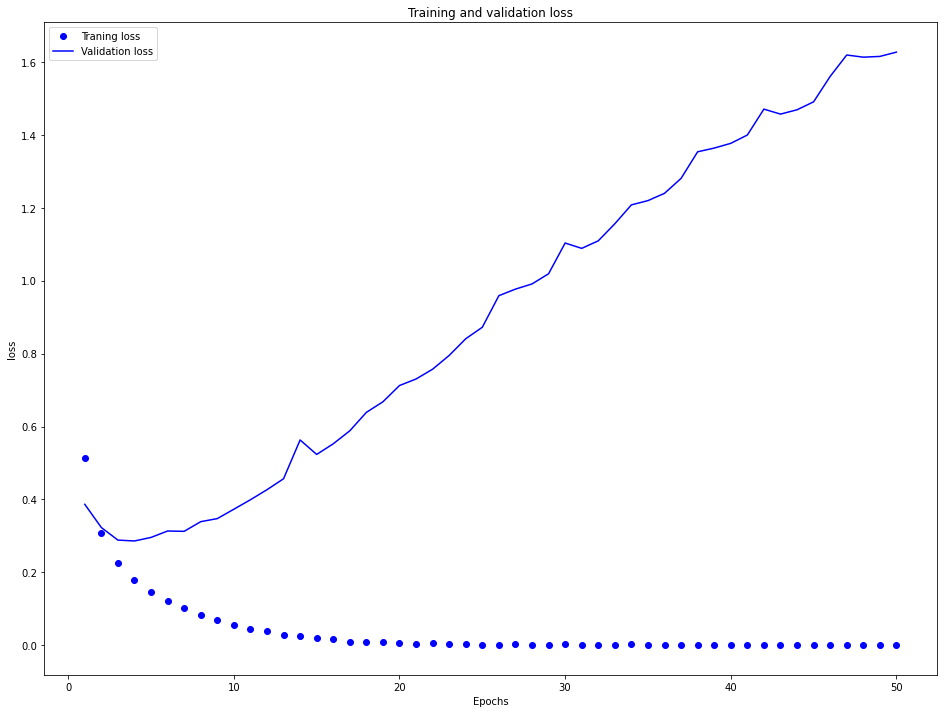

In [42]:

# 33 슬라이드
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label = 'Traning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



<Figure size 432x288 with 0 Axes>

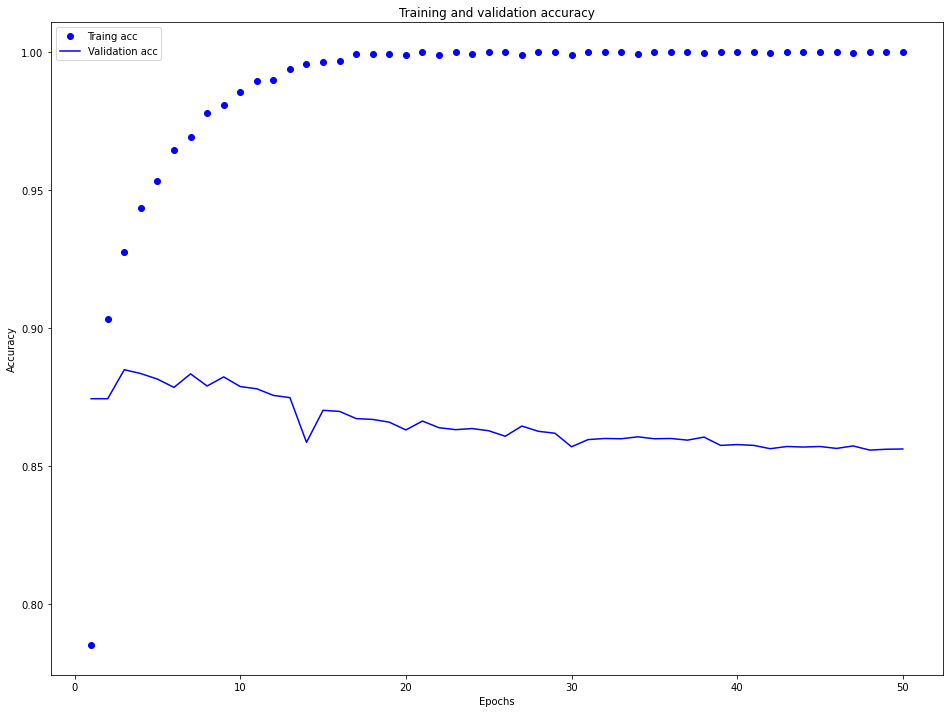

In [46]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure(figsize =(16,12))
plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size= 512)

results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/4
49/49 [==============================] - 0s 9ms/step - loss: 0.4391 - accuracy: 0.8186
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2519 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1948 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 1s 937us/step - loss: 0.3047 - accuracy: 0.8784
[0.30471622943878174, 0.8784400224685669]


In [49]:
model.predict(x_test)

array([[0.12619442],
       [0.9997649 ],
       [0.76787746],
       ...,
       [0.10312402],
       [0.06058952],
       [0.5712092 ]], dtype=float32)